<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/Obitos_Tabnet_2013_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-learn

     |████████████████████████████████| 23.1 MB 74.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import math
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.style     as style
import numpy                as np
import seaborn              as sns
import pandas               as pd

from urllib.request                 import urlopen
from zipfile                        import ZipFile
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from statsmodels.tsa.seasonal       import seasonal_decompose
from sklearn.metrics                import mean_squared_error
from sklearn.metrics                import mean_absolute_percentage_error
from sklearn.linear_model           import LinearRegression

stl = style.available
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
prefGo    = 'https://docs.google.com/uc?export=download&id='
urlTabnet = prefGo + '1z1vn0D9Efnl-wRO_tYDZafZhLGRrPwc0'

In [4]:
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
mesN = [1,2,3,4,5,6,7,8,9,10,11,12]

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
            'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
            'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
            'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
            'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
            'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
            'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
            'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
            'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
            'Set3_r', 'Spectral', 'Spectral_r',
            #'Vega10', 'Vega10_r', 'Vega20',
            'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 
            'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
            'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
            'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 
            'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
            'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
            'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
            'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
            'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
            'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
            #'jet', ##'jet_r', 
            'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
            'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
            'rocket_r', 'seismic', 'seismic_r', ##'spectral', 'spectral_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
            'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
            'winter', 'winter_r']

# Definições de estilo
if 1==1: #tema Claro para artigo retrato
    DefPalette = palettes[13] #13 Dark2
    DefPaletteHist = 'rocket'
    DefStyle = stl[15] #15 Seaborn-Darkgrid
    DefSize = (10,6) #(17,6)
    DefGrid = ('-')

else: # tema Escuro para apresentação paisagem
    DefPalette = palettes[123] #123 - hsv
    DefPaletteHist = 'rocket'
    DefStyle = stl[4] #15 dark_background
    DefSize = (10,6) #(17,6)
    DefGrid = (':')
    plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 
                    'ytick.color':'white', 'figure.facecolor':'black'})

In [5]:
tabnet = pd.read_csv(urlTabnet, sep =';', decimal=',', skiprows=3, skipfooter=6, encoding='latin_1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
tabnet.head()

,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,2013,2697,1281,3764,625,10080,969,2709,8209,5885,15084,5373,8299,20923,6197,3411,26115,51353,7305,38637,113499,28710,16381,35653,5857,6294,9924,5720,440954
1,..Janeiro/2013,203,98,342,58,861,85,206,659,437,1154,399,754,1637,512,218,2049,4425,688,3280,9585,2418,1351,2860,461,548,820,477,36585
2,..Fevereiro/2013,211,147,334,44,864,70,213,584,505,1159,403,603,1612,510,297,1935,3980,657,2784,8749,2211,1309,2615,460,476,801,577,34110
3,..Março/2013,243,109,334,71,859,63,243,557,375,1251,433,702,1703,429,346,2046,3964,593,3077,8706,2225,1183,2677,444,543,722,574,34472
4,..Abril/2013,261,134,380,48,821,94,251,635,568,1390,438,683,1730,545,360,2078,4123,599,3187,9184,2326,1269,2803,427,525,748,553,36160


In [7]:
tabnet['Ano/mês processamento'] = tabnet['Ano/mês processamento'].str.replace('..','',regex=False)
tabnet = tabnet[tabnet['Ano/mês processamento'].str.len() >= 6]
tabnet['Ano'] = tabnet['Ano/mês processamento'].str[-4:]
tabnet['Mês'] = tabnet['Ano/mês processamento'].str[:-5]
tabnet.drop(columns = 'Ano/mês processamento')


,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total,Ano,Mês
1,203,98,342,58,861,85,206,659,437,1154,399,754,1637,512,218,2049,4425,688,3280,9585,2418,1351,2860,461,548,820,477,36585,2013,Janeiro
2,211,147,334,44,864,70,213,584,505,1159,403,603,1612,510,297,1935,3980,657,2784,8749,2211,1309,2615,460,476,801,577,34110,2013,Fevereiro
3,243,109,334,71,859,63,243,557,375,1251,433,702,1703,429,346,2046,3964,593,3077,8706,2225,1183,2677,444,543,722,574,34472,2013,Março
4,261,134,380,48,821,94,251,635,568,1390,438,683,1730,545,360,2078,4123,599,3187,9184,2326,1269,2803,427,525,748,553,36160,2013,Abril
5,271,100,335,46,839,83,241,823,553,1381,446,729,1864,504,319,2304,4341,637,3271,9826,2209,1339,2839,476,500,908,461,37645,2013,Maio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,442,143,1334,190,1175,110,257,1066,675,1742,714,985,2822,674,433,2913,6405,1287,5643,13516,3738,2220,4255,789,673,1412,706,56319,2021,Janeiro
106,424,188,1619,322,1290,136,314,1154,763,1831,740,1021,2487,697,562,3029,6125,1117,5028,13144,4004,2280,3893,786,674,1341,644,55613,2021,Fevereiro
107,795,205,1893,299,1534,205,437,1870,772,2546,805,1183,2848,855,489,3507,7846,1471,6379,17734,5077,3178,6073,902,1097,2308,1066,73374,2021,Março
108,654,335,1214,210,2077,180,337,1944,938,3238,1055,1300,3187,1029,620,3773,9321,1810,7142,20503,5554,3235,6380,1053,1137,2121,1610,81957,2021,Abril


In [8]:
mapmes = {'Janeiro':1, 'Fevereiro':2, 'Março':3, 'Abril':4, 'Maio':5, 'Junho':6,
 'Julho':7, 'Agosto':8, 'Setembro':9, 'Outubro':10, 'Novembro':11, 'Dezembro':12}

In [9]:
tabnet['Mês'] = tabnet['Mês'].str.strip()
tabnet['mm'] = tabnet['Mês'].map(mapmes)

In [10]:
tabnet['Ano_mes'] = tabnet.Ano.astype(str) + '-' + ('0'+tabnet.mm.astype(str).str[-2:])

In [11]:
tabnet.mm.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

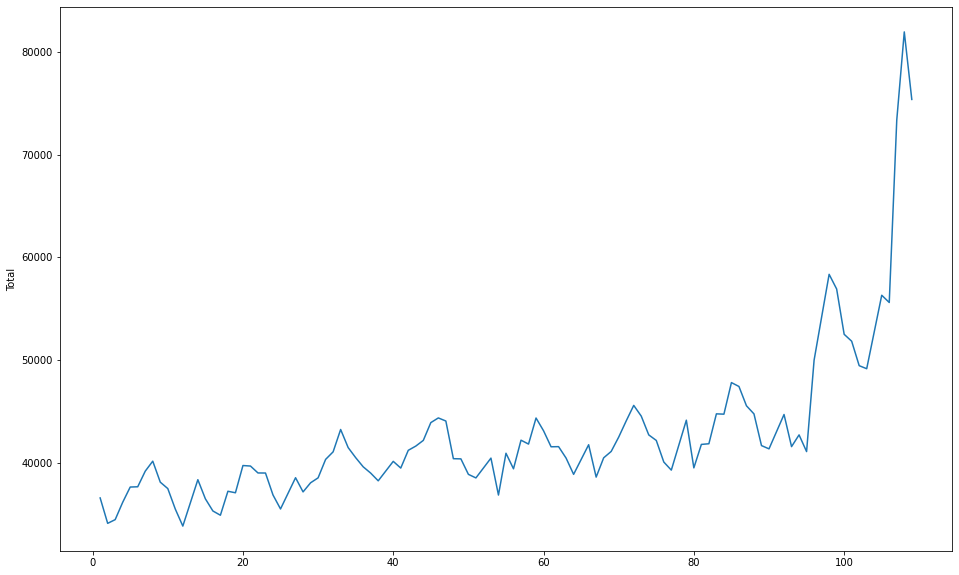

In [12]:
plt.figure(figsize = (16,10))
sns.lineplot(data=tabnet, x = tabnet.index, y=tabnet.Total)

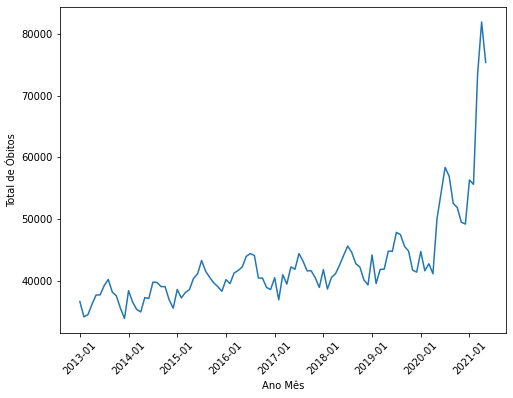

In [13]:
plt.figure(figsize = (8,6))
ax = sns.lineplot(data=tabnet, x = tabnet.Ano_mes, y=tabnet.Total)
ax.set_xticks(ax.get_xticks()[::12])
plt.xticks(rotation = 45)
plt.xlabel('Ano Mês')
plt.ylabel('Total de Óbitos')
plt.show();

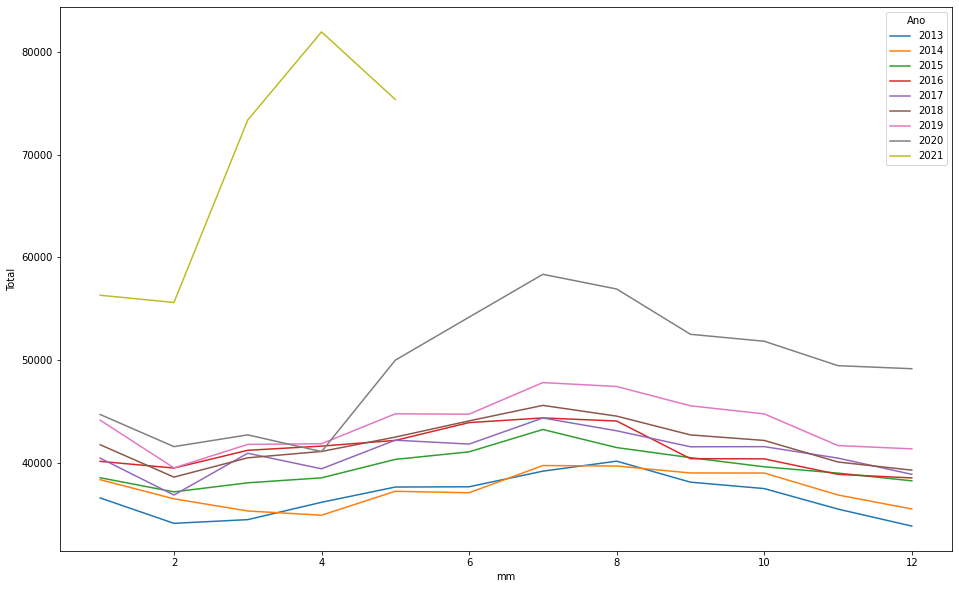

In [14]:
plt.figure(figsize = (16,10))
sns.lineplot(data=tabnet, x = tabnet.mm, y=tabnet.Total, hue=tabnet.Ano)

In [ ]:
tabnet = pd.read_csv(urlTabnet, sep =';', decimal=',', skiprows=3, skipfooter=6, encoding='latin_1')
tabnet['Ano/mês processamento'] = tabnet['Ano/mês processamento'].str.replace('..','',regex=False)
tabnet = tabnet[tabnet['Ano/mês processamento'].str.len() >= 6]
tabnet['Ano'] = tabnet['Ano/mês processamento'].str[-4:]
tabnet['Mês'] = tabnet['Ano/mês processamento'].str[:-5]
tabnet['Mês'] = tabnet['Mês'].str.strip()
mapmes = {'Janeiro':'01', 'Fevereiro':'02', 'Março':'03', 'Abril':'04', 'Maio':'05', 'Junho':'06',
 'Julho':'07', 'Agosto':'08', 'Setembro':'09', 'Outubro':'10', 'Novembro':'11', 'Dezembro':'12'}
tabnet['mm'] = tabnet['Mês'].map(mapmes)
tabnet.drop(columns = 'Ano/mês processamento')
tabnet['Ano Mês'] = tabnet.Ano +'-'+ tabnet.mm 
tabnet = tabnet.rename(columns = {'Total': 'BR'})
tabnet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,BR,Ano,Mês,mm,Ano Mês
1,Janeiro/2013,203,98,342,58,861,85,206,659,437,1154,399,754,1637,512,218,2049,4425,688,3280,9585,2418,1351,2860,461,548,820,477,36585,2013,Janeiro,01,2013-01
2,Fevereiro/2013,211,147,334,44,864,70,213,584,505,1159,403,603,1612,510,297,1935,3980,657,2784,8749,2211,1309,2615,460,476,801,577,34110,2013,Fevereiro,02,2013-02
3,Março/2013,243,109,334,71,859,63,243,557,375,1251,433,702,1703,429,346,2046,3964,593,3077,8706,2225,1183,2677,444,543,722,574,34472,2013,Março,03,2013-03
4,Abril/2013,261,134,380,48,821,94,251,635,568,1390,438,683,1730,545,360,2078,4123,599,3187,9184,2326,1269,2803,427,525,748,553,36160,2013,Abril,04,2013-04
5,Maio/2013,271,100,335,46,839,83,241,823,553,1381,446,729,1864,504,319,2304,4341,637,3271,9826,2209,1339,2839,476,500,908,461,37645,2013,Maio,05,2013-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Janeiro/2021,442,143,1334,190,1175,110,257,1066,675,1742,714,985,2822,674,433,2913,6405,1287,5643,13516,3738,2220,4255,789,673,1412,706,56319,2021,Janeiro,01,2021-01
106,Fevereiro/2021,424,188,1619,322,1290,136,314,1154,763,1831,740,1021,2487,697,562,3029,6125,1117,5028,13144,4004,2280,3893,786,674,1341,644,55613,2021,Fevereiro,02,2021-02
107,Março/2021,795,205,1893,299,1534,205,437,1870,772,2546,805,1183,2848,855,489,3507,7846,1471,6379,17734,5077,3178,6073,902,1097,2308,1066,73374,2021,Março,03,2021-03
108,Abril/2021,654,335,1214,210,2077,180,337,1944,938,3238,1055,1300,3187,1029,620,3773,9321,1810,7142,20503,5554,3235,6380,1053,1137,2121,1610,81957,2021,Abril,04,2021-04


In [16]:
tabnet.columns

Index(['Ano/mês processamento', 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA',
       'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP',
       'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'Total', 'Ano', 'Mês', 'mm',
       'Ano_mes'],
      dtype='object')

In [58]:
tabnet.Total

1      36585
2      34110
3      34472
4      36160
5      37645
       ...  
105    56319
106    55613
107    73374
108    81957
109    75383
Name: Total, Length: 101, dtype: int64

In [44]:
tabnet['dataref'] = tabnet.Ano_mes + '-01'

In [41]:
#tabnet.dataref = tabnet.dataref.to_timestamp

In [122]:
dec = tabnet
dec.index = pd.to_datetime(tabnet.dataref, format= '%Y-0%m-%d',errors='coerce')

In [123]:
decomp.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dataref  78 non-null     object
 1   Total    102 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [124]:
dec.iloc[5:15,:]

,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total,Ano,Mês,mm,Ano_mes,dataref
dataref,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-01,Junho/2013,236,80,343,64,898,92,250,692,567,1372,510,749,1817,554,290,2260,4354,591,3299,9578,2365,1406,2877,503,604,843,477,37671,2013,Junho,6,2013-06,2013-06-01
2013-07-01,Julho/2013,201,127,206,54,821,108,190,731,499,1101,462,765,1914,550,305,2496,4603,608,3566,10002,2569,1475,3288,569,527,921,533,39191,2013,Julho,7,2013-07,2013-07-01
2013-08-01,Agosto/2013,230,101,345,74,826,90,262,703,621,1333,443,700,1815,550,276,2295,4584,617,3412,10638,2636,1454,3608,510,582,930,530,40165,2013,Agosto,8,2013-08,2013-08-01
2013-09-01,Setembro/2013,236,106,277,57,864,74,221,759,448,1218,444,708,1781,489,274,2296,4483,522,3388,9923,2577,1497,3205,509,502,819,442,38119,2013,Setembro,9,2013-09,2013-09-01
2013-10-01,Outubro/2013,228,99,307,38,803,70,239,708,404,1298,530,655,1744,605,243,2249,4400,636,3263,9857,2463,1390,3102,537,478,764,385,37495,2013,Outubro,10,2013-010,2013-010-01
2013-11-01,Novembro/2013,209,91,291,48,856,73,199,623,463,1196,451,639,1635,499,218,2121,4130,607,3206,8889,2403,1422,2941,489,522,867,410,35498,2013,Novembro,11,2013-011,2013-011-01
2013-12-01,Dezembro/2013,168,89,270,23,768,67,194,735,445,1231,414,612,1671,450,265,1986,3966,550,2904,8562,2308,1286,2838,472,487,781,301,33843,2013,Dezembro,12,2013-012,2013-012-01
2014-01-01,Janeiro/2014,234,100,328,53,804,112,249,814,519,1319,521,649,1715,577,247,2245,4457,625,3296,10088,2372,1575,3037,498,550,909,467,38360,2014,Janeiro,1,2014-01,2014-01-01
2014-02-01,Fevereiro/2014,250,70,253,47,809,56,214,651,516,1338,501,633,1635,462,264,2129,3954,574,3112,9848,2396,1412,3120,496,497,792,471,36500,2014,Fevereiro,2,2014-02,2014-02-01


In [126]:
dec.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01'],
              dtype='datetime64[ns]', name='dataref', length=101, freq=None)

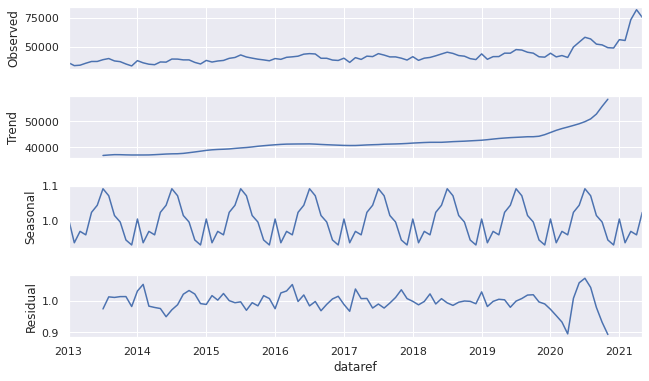

In [130]:
decomposicao = seasonal_decompose(dec.Total, model = 'multiplicative')
sns.set_theme()
style.use(DefStyle)
ax = decomposicao.plot()   
plt.gcf().set_size_inches(DefSize)

plt.show();